Text(0.5, 0, 'Demora [#]')

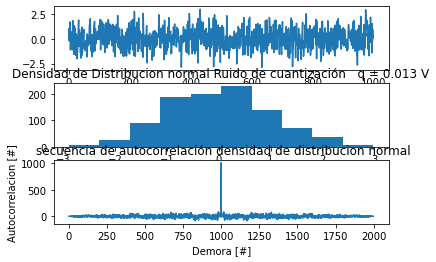

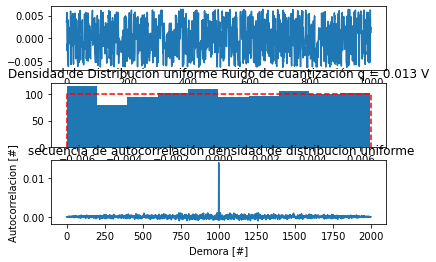

In [2]:
# La distribución Uniforme. La distribución Uniforme es el modelo (absolutamente) continuo más simple. 
# Corresponde al caso de una variable aleatoria que sólo puede tomar valores comprendidos 
# entre dos extremos a y b, de manera que todos los intervalos de una misma longitud (dentro de (a, b)) 
# tienen la misma probabilidad.

# El ruido blanco o sonido blanco es una señal aleatoria (proceso estocástico) que se caracteriza 
# por el hecho de que sus valores de señal en dos tiempos diferentes no guardan correlación estadística.
# Como consecuencia de ello, su densidad espectral de potencia (PSD, siglas en inglés de power spectral density) 
# es una constante, es decir, su gráfica es plana.1​ Esto significa que la señal contiene todas las frecuencias 
# y todas ellas muestran la misma potencia. Igual fenómeno ocurre con la luz blanca, de allí la denominación.

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy.signal as sig

def generador_ruido_normal (media , sigma  , N):
    #tt = np.arange(0.0, N/fs, 1/fs)
    Rn = np.random.normal(media, sigma, size = [N,1])
    return  Rn

def generador_ruido_uniform (q , N ):
    Ru = np.random.uniform ( -q/2 , q/2 , N)
    return Ru


media = 0
sigma = 1
N = 1000
Vref = 3.3 #volt
B = 8 #bits
q = Vref/2**B

Rn = generador_ruido_normal (media,sigma,N)
Ru = generador_ruido_uniform (q,N)

Rn_ac = sig.correlate(Rn , Rn )  
Ru_ac = sig.correlate(Ru  , Ru )

Rnf = np.fft.fft(Rn_ac , N)
Rabs = np.abs(Rnf)
Rangle = np.angle(Rnf) 

plt.figure(1)
plt.subplot(3 , 1 , 1)
plt.plot(Rn)
plt.subplot(3 , 1 , 2)
bins = 10
plt.hist(Rn, bins=bins)
plt.title( 'Densidad de Distribucion normal Ruido de cuantización   q = {:3.3f} V'.format(q))
plt.subplot (3 , 1 , 3)
plt.plot( Rn_ac)
plt.title( ' secuencia de autocorrelación densidad de distribucion normal')
plt.ylabel('Autocorrelacion [#]')
plt.xlabel('Demora [#]')



plt.figure(2)
plt.subplot(3 , 1 , 1)
plt.plot(Ru)
plt.subplot(3 , 1 , 2)
bins = 10
plt.hist(Ru, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Densidad de Distribucion uniforme Ruido de cuantización q = {:3.3f} V'.format (q))
plt.subplot(3 , 1 , 3)
plt.plot( Ru_ac)
plt.title( ' secuencia de autocorrelación densidad de distribucion uniforme')
plt.ylabel('Autocorrelacion [#]')
plt.xlabel('Demora [#]')